# Basic example with GPN

## Setup

In [ ]:
# !pip install --quiet git+https://github.com/songlab-cal/gpn.git

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.5/151.5 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.6/184.6 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.7/210.7 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.1 MB/s eta 0:00:00
ERR

In [24]:
import gpn.model
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import torch
from transformers import AutoModel, AutoModelForMaskedLM, AutoTokenizer
from torch.nn import functional as F

In [27]:
print(torch.arange(0, 5) % 3)
print(F.one_hot(torch.arange(0, 5) % 3))

tensor([0, 1, 2, 0, 1])
tensor([[1, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
        [1, 0, 0],
        [0, 1, 0]])


In [3]:
# model_path = "songlab/gpn-brassicales"
model_path = "/home/asb5975/group/lab/alan/deep_learning_sequence_prediction/super_long_run_all_genomes/seed_12178"

Example region: chr5:3566900-3567600

[UCSC Genome Browser view](https://genome.ucsc.edu/s/gbenegas/gpn%2Darabidopsis%2Dnotebook)

![title](https://raw.githubusercontent.com/songlab-cal/gpn/refs/heads/main/examples/ss/browser_example.png)

In [4]:
seq = "CGGGTTAAAAATCTAGTTGTTATTATTAAAGGAAATAAAATATCCTCATAAAACAATTTGTTGTAATCTATCTTTGGGCTAATGTTCTTATCCTACAAGACGAACCCTGACCGTATTCGTCGTAGAAAAAAAATTGCTTCGATCCCATCATTGAGTTCAATAATCGGCGCACAAAGGCCGATTCATAAAAACTCTAGGCCCATTAAAGTAAAGCCCATTCTCAACCCTATCCAGTCTCCCTGTATATATATATTTACGACACCAACCCAGCGTTGATATTTAATTTTCTTCAGTCAGAGATTTCGAAACCCTAGTCGATTTCGAGATCCAACTAACTCTGCTCCTTATCTCAGGTAAAATTCTCGCTCGAGAACTCAATTGCTTATCCAAAGTTCCAACTGAAGATGCTTTCCTACTGAATCTTAGGTTAATGTTTTGGATTTGGAATCTTACCCGAAATTTCTCTGCAGCTTGTTGAATTTGCGAAGTATGGGAGACGCTAGAGACAACGAAGCCTACGAGGAGGAGCTCTTGGACTATGAAGAAGAAGACGAGAAGGTCCCAGATTCTGGAAACAAAGTTAACGGCGAAGCTGTGAAAAAGTGAGTTTTATGGTTTCCTCGATATGTTTCATGTATACTACTGTGTGTTTAAATTTGTCGATTCTTAGATTACTACTTGATAACAAGTAGCAGTATGT"
len(seq)

700

## Tokenization

In [5]:
tokenizer = AutoTokenizer.from_pretrained(model_path)
tokenizer.get_vocab()

{'g': 5, '[MASK]': 1, '[PAD]': 0, '[UNK]': 2, 't': 6, 'c': 4, 'a': 3}

In [6]:
input_ids = tokenizer(seq, return_tensors="pt", return_attention_mask=False, return_token_type_ids=False)["input_ids"]
print(input_ids.shape)
input_ids[0, :10]

torch.Size([1, 700])


tensor([4, 5, 5, 5, 6, 6, 3, 3, 3, 3])

## Embedding

In [7]:
model = AutoModel.from_pretrained(model_path)
model.eval();

In [8]:
with torch.no_grad():
    embedding = model(input_ids=input_ids).last_hidden_state
embedding.shape

torch.Size([1, 700, 512])

In [9]:
# Let's do a quick visualization. We'll standardize the embeddings.

In [9]:
embedding_df = pd.DataFrame(StandardScaler().fit_transform(embedding[0].numpy()))
embedding_df.index.name = "Position"
embedding_df.columns.name = "Embedding dimension"
embedding_df

Embedding dimension,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
Position,,,,,,,,,,,,,,,,,,,,,
0,-0.200324,1.708400,2.252429,3.538841,-0.296211,0.518505,-0.859287,-0.175400,-0.502637,-0.437656,...,-0.360273,-1.064394,1.010340,-0.420123,-0.864644,-0.757818,-0.397008,-0.853214,-0.817098,-0.080763
1,0.389766,0.766804,0.357331,1.845713,-1.372066,0.021679,0.334622,-0.804893,-0.202659,-0.971840,...,-1.290884,-0.541787,1.455458,-0.234465,-0.501668,-0.914754,1.094024,-1.020476,1.465397,1.067681
2,0.063722,0.806879,0.946770,0.889311,-1.002337,0.584532,-0.199361,0.620796,-0.269763,0.355254,...,-1.270901,-0.278788,0.222710,-0.325301,-0.082757,-0.681869,0.159104,-0.682421,1.969887,0.222462
3,-0.335111,0.003135,0.558910,-0.286088,-1.348129,0.360547,-0.335929,0.976914,0.392445,-1.242218,...,-1.711473,-0.253421,2.133832,-1.318660,-0.299816,-0.842425,1.282099,-0.381311,0.814081,-0.374538
4,-0.662412,0.203417,-0.589261,-0.520917,-0.004780,-0.900782,0.750317,1.552085,-0.064026,0.517779,...,-0.889515,0.082672,2.079068,-0.338285,-0.338089,-0.770975,-0.498242,-0.607300,-0.401633,-1.063334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0.333238,0.327122,-0.514566,-1.010835,-1.105093,-1.098827,-0.266916,0.347149,0.747858,0.748854,...,-0.767504,-0.432680,0.204663,-0.636262,0.046863,-1.026998,-0.012118,0.264855,-1.027639,0.678354
696,1.249404,0.202030,-0.346796,-0.800482,1.079852,1.537622,1.815030,0.209223,-0.993000,-1.446465,...,-0.229410,0.019819,-0.347367,-0.218429,-0.665615,-0.821772,-0.418923,-0.396610,0.171545,-0.617927
697,-0.611830,0.477103,2.714125,-0.848587,-0.492746,-0.595748,1.135416,-0.319472,-0.174229,-1.536294,...,1.019128,-0.506290,-1.093364,0.273426,-0.196876,-0.210591,0.154417,-0.840800,-0.627685,1.244039


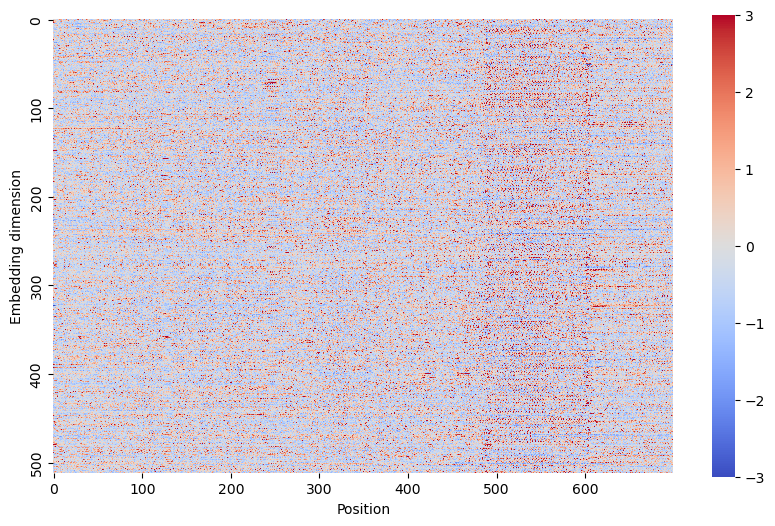

In [10]:
# If you squint you can see the exon locations :)
plt.figure(figsize=(10, 6))
sns.heatmap(embedding_df.T, center=0, vmin=-3, vmax=3, cmap="coolwarm", square=True, xticklabels=100, yticklabels=100);

## Masked language modeling

In [11]:
model_for_mlm = AutoModelForMaskedLM.from_pretrained(model_path)
model_for_mlm.eval();

In [12]:
seq[489:492]  # Start codon

'ATG'

In [13]:
pos = 489  # Let's mask the A and check the model predictions
input_ids[0, pos] = tokenizer.mask_token_id

In [14]:
input_ids
with torch.no_grad():
    all_logits = model_for_mlm(input_ids=input_ids).logits
all_logits.shape

torch.Size([1, 700, 7])

In [15]:
nucleotides = list('acgt')
logits = all_logits[0, pos, [tokenizer.get_vocab()[nc] for nc in nucleotides]]
logits

tensor([ 0.3317, -0.2988, -0.3877,  0.4317])

In [16]:
probs = torch.nn.functional.softmax(logits, dim=0).numpy()
probs

array([0.32004213, 0.1703642 , 0.15588133, 0.35371235], dtype=float32)

<Axes: xlabel='nucleotide', ylabel='probability'>

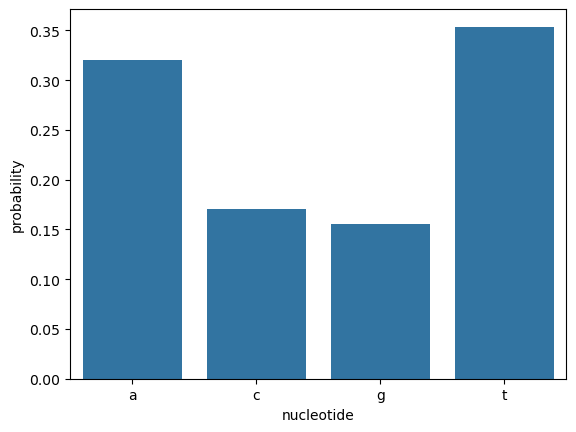

In [17]:
probs_df = pd.DataFrame(dict(nucleotide=nucleotides, probability=probs))
sns.barplot(data=probs_df, x="nucleotide", y="probability")